In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import requests
import datetime

%load_ext autoreload
%autoreload 2

In [10]:
from access_treasurydirectgov import *
import bond_analytics as ba
from db_manager_UST import *

In [9]:
def calc_yield(row):
    dt_start = datetime.datetime(2019,1,1)
    dt_end = row['MATURITY DATE']
    coupon = row['RATE']
    today = row['Date']
    price = row['END OF DAY']
    if price < 0.01:
        price = 0.5*(row['BUY'] + row['SELL'])
    
    b = ba.USConventional(row['SECURITY TYPE'], dt_start, dt_end, coupon)
    y = b.get_yield(today, price)
    
    return y

df_note['Yield'] = df_note.apply(calc_yield, axis = 1)

In [10]:
df_note_dt = df_note[df_note['Date'] == '2020-07-30']

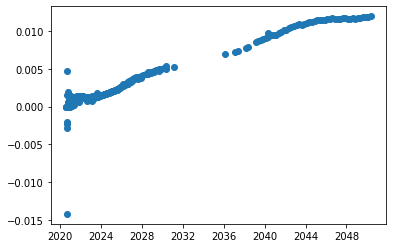

In [11]:
df_p = df_note_dt
plt.figure()
x = df_p['MATURITY DATE']
y = df_p['Yield']
plt.plot(x, y, 'o')
plt.show()

In [39]:
import pymongo

In [40]:
myclient = pymongo.MongoClient('mongodb://localhost:27017/')

In [41]:
mydb = myclient['mydatabase']

In [42]:
myclient.list_database_names()

['admin', 'config', 'local']

In [43]:
mycol = mydb['customers']

In [45]:
x = mycol.find_one()

In [48]:
print(x)

None


In [17]:
print(mydb.list_collection_names())

['customers']


In [18]:
collist = mydb.list_collection_names()
if "customers" in collist:
  print("The collection exists.")

The collection exists.


In [19]:
mydict = {'name':'john', 'address':'highway 37'}
x = mycol.insert_one(mydict)

In [21]:
mycol.find_one()

{'_id': ObjectId('5f25766bc8cab274b64fe693'),
 'name': 'john',
 'address': 'highway 37'}

In [130]:
collist = mydb.list_collection_names()
if "customers" in collist:
  print("The collection exists.")

The collection exists.


In [131]:
x.inserted_id

ObjectId('5f25766bc8cab274b64fe693')

In [138]:
mycol.insert_many(df_note.to_dict(orient = 'records'))

In [154]:
pd.DataFrame(mycol.find({'BUY':{'$lt':0.1}}, {'_id':0}))

,CUSIP,SECURITY TYPE,RATE,MATURITY DATE,CALL DATE,BUY,SELL,END OF DAY,Date,Yield
0,912828Y46,MARKET BASED NOTE,0.02625,2020-07-31,,0.0,100.06250,100.06250,2020-07-20,0.000823
1,912828XM7,MARKET BASED NOTE,0.01625,2020-07-31,,0.0,100.03125,100.03125,2020-07-20,0.003517
2,912828VP2,MARKET BASED NOTE,0.02000,2020-07-31,,0.0,100.03125,100.03125,2020-07-20,0.007234
3,9128282Q2,MARKET BASED NOTE,0.01500,2020-08-15,,0.0,100.09375,100.09375,2020-07-20,0.000644
4,912828NT3,MARKET BASED NOTE,0.02625,2020-08-15,,0.0,100.15625,100.15625,2020-07-20,0.002208
...,...,...,...,...,...,...,...,...,...,...
262,912828A83,MARKET BASED NOTE,0.02375,2020-12-31,,0.0,100.90625,0.00000,2020-07-31,2.676000
263,912828N48,MARKET BASED NOTE,0.01750,2020-12-31,,0.0,100.65625,0.00000,2020-07-31,2.679117
264,9128285S5,MARKET BASED NOTE,0.02500,2020-12-31,,0.0,100.96875,0.00000,2020-07-31,2.674672
265,9128283Q1,MARKET BASED NOTE,0.02000,2021-01-15,,0.0,100.84375,0.00000,2020-07-31,2.330970
